# 线性回归

---

- [函数式编程](#函数式编程)

- [类式编程](#类式编程)

In [1]:
import numpy as np

## 函数式编程
### 模型主体 损失函数

In [2]:
def linear_loss(X, y, w, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    # 公式 预测值 yi
    y_hat = np.dot(X, w) + b
    # 损失函数
    loss = np.sum( (y_hat - y) ** 2) / num_train
    # 求偏导
    dw = np.dot(X.T, (y_hat - y)) / num_train
    db = np.sum((y_hat - y)) / num_train
    return y_hat, loss, dw, db

### 参数初始化

In [3]:
def initialize_params(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

### 梯度下降 训练

In [4]:
def linar_train(X, y, learning_rate, epochs):
    w, b = initialize_params(X.shape[1])
    loss_list = []
    for i in range(1, epochs):
        # 计算当前预测值，损失和偏导
        y_hat, loss, dw, db = linear_loss(X, y, w, b)
        loss_list.append(loss)
        
        # 梯度下降更新参数
        w += -learning_rate * dw
        b += -learning_rate * db
        
        # 打印迭代次数和损失
        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss)) 
        
        # 保存参数
        params = {
            'w': w,
            'b': b
        }
        # 保存梯度
        grads = {
            'dw': dw,
            'db': db
        }
        
    return loss_list, loss, params, grads

### 测试案例

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

# 打乱数据
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)

# 训练集和测试集简单划分
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train= {0}'.format(X_train.shape))
print('X_test= {0}'.format(X_test.shape))
print('y_train= {0}'.format(y_train.shape))
print('y_test= {0}'.format(y_test.shape))

X_train= (397, 10)
X_test= (45, 10)
y_train= (397, 1)
y_test= (45, 1)


### 训练模型

In [6]:
loss_list, loss, params, grads = linar_train(X_train, y_train, 0.001, 100000)

epoch 10000 loss 5533.039734
epoch 20000 loss 5217.582409
epoch 30000 loss 4949.676466
epoch 40000 loss 4721.504031
epoch 50000 loss 4526.567333
epoch 60000 loss 4359.463960
epoch 70000 loss 4215.700505
epoch 80000 loss 4091.538010
epoch 90000 loss 3983.863771


In [7]:
print(params)

{'w': array([[  44.07229775],
       [  -6.99872355],
       [ 157.0665895 ],
       [ 118.32921584],
       [  37.47920655],
       [  24.97681831],
       [-104.31188822],
       [ 104.03504877],
       [ 148.85521477],
       [  94.07047013]]), 'b': 151.57222424703687}


### 预测

In [8]:
def predict(X, params):
    w = params['w']
    b = params['b']
    y_pred = np.dot(X, w) + b;
    return y_pred

In [9]:
y_pred = predict(X_test, params)
y_pred[:5]

array([[132.02545017],
       [141.77423134],
       [150.48352021],
       [128.48666753],
       [147.29312454]])

### 绘图

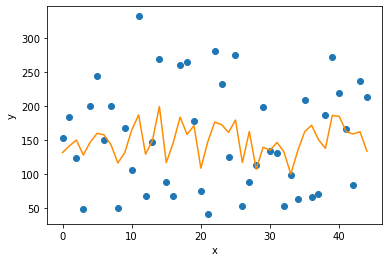

In [11]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color='darkorange')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 训练过程中的损失下降

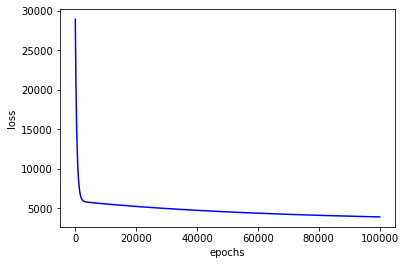

In [12]:
plt.plot(loss_list, color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

---
# 类式编程

- 封装一个线性回归类

In [23]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import load_diabetes

class lr_model():
    def __init__(self):
        pass
    
    def prepare_data(self):
        data = load_diabetes().data
        target = load_diabetes().target
        X, y = shuffle(data, target, random_state=42)
        X = X.astype(np.float32)
        y = y.reshape((-1, 1))
        data = np.concatenate((X, y), axis=1)
        return data
    
    def initialize_params(self, dims):
        w = np.zeros((dims, 1))
        b = 0
        return w, b
    
    def linear_loss(self, X, y, w, b):
        num_train = X.shape[0]
        num_feature = X.shape[1]
        
        y_hat = np.dot(X, w) + b
        loss = np.sum( (y_hat - y) ** 2 ) / num_train
        dw = np.dot(X.T, (y_hat - y)) / num_train
        db = np.sum((y_hat - y)) / num_train
        return y_hat, loss, dw, db
    
    def linear_train(self, X, y, learning_rate, epochs):
        w, b = self.initialize_params(X.shape[1])
        for i in range(1, epochs):
            y_hat, loss, dw, db = linear_loss(X, y, w, b)
            w += -learning_rate * dw
            b += -learning_rate * db
            if i % 10000 == 0:
                print('epoch {0} loss {1}'.format(i, loss))
            
            params = {
                'w': w,
                'b': b
            }
            grads = {
                'dw':dw,
                'db':db
            }
        return loss,params,grads

    def predict(self, X, params):
        w = params['w']
        b = params['b']
        y_pred = np.dot(X, w) + b
        return y_pred
    
    def linear_cross_validation(self, data, k, randomize=True):        
        if randomize:
            data = list(data)
            shuffle(data)

        slices = [data[i::k] for i in range(k)]        
        for i in range(k):
            validation = slices[i]
            train = [data                        
            for s in slices if s is not validation for data in s]
            train = np.array(train)
            validation = np.array(validation)            
            yield train, validation

In [24]:
if __name__ == '__main__':
    lr = lr_model()
    data = lr.prepare_data()   
 
    for train, validation in lr.linear_cross_validation(data, 5):
        X_train = train[:, :10]
        y_train = train[:, -1].reshape((-1, 1))
        X_valid = validation[:, :10]
        y_valid = validation[:, -1].reshape((-1, 1))

        loss5 = []
        loss, params, grads = lr.linear_train(X_train, y_train, 0.001, 100000)
        loss5.append(loss)
        score = np.mean(loss5)
        print('five kold cross validation score is', score)
        y_pred = lr.predict(X_valid, params)
        valid_score = np.sum(((y_pred - y_valid) ** 2)) / len(X_valid)
        print('valid score is', valid_score)

epoch 10000 loss 5611.704502478564
epoch 20000 loss 5258.726276801027
epoch 30000 loss 4960.2718112554985
epoch 40000 loss 4707.234956681375
epoch 50000 loss 4492.067734424241
epoch 60000 loss 4308.5117235013295
epoch 70000 loss 4151.375891647112
epoch 80000 loss 4016.3528004708087
epoch 90000 loss 3899.8665512289713
five kold cross validation score is 3798.9563843996484
valid score is 4214.092765494475
epoch 10000 loss 5421.16840376138
epoch 20000 loss 5106.640863581357
epoch 30000 loss 4838.968256863074
epoch 40000 loss 4610.442887132758
epoch 50000 loss 4414.6618742708415
epoch 60000 loss 4246.304448852243
epoch 70000 loss 4100.94737863565
epoch 80000 loss 3974.9119614775136
epoch 90000 loss 3865.137181684814
five kold cross validation score is 3769.0835464956263
valid score is 4615.051403980545
epoch 10000 loss 5586.6523422805485
epoch 20000 loss 5295.082495919437
epoch 30000 loss 5044.857032863054
epoch 40000 loss 4829.540681339524
epoch 50000 loss 4643.729724208652
epoch 60000 lo